In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
import uuid
from typing import TypedDict, Annotated

In [2]:
load_dotenv()
model = ChatOpenAI()

In [3]:
class ChatState(TypedDict):
    name: str
    dream_job: str
    recommendation: str

In [42]:
def generate_recommendation(state: ChatState):
    prompt = (
        f"You are a career advisor. Based on the dream job: \"{state['dream_job']}\", "
        f"recommend suggestions to help {state['name']} land this job in less than 50 words."
    )

    recommendation = model.invoke(prompt)

    return {"recommendation": recommendation}


In [43]:
graph = StateGraph(ChatState)

graph.add_node("generate_recommendation", generate_recommendation)

graph.add_edge(START, "generate_recommendation")
graph.add_edge("generate_recommendation", END)

checkpointer = MemorySaver()
chatbot = graph.compile(checkpointer=checkpointer)

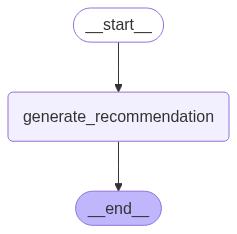

In [44]:
chatbot

In [68]:
thread_id = uuid.uuid4()

initial_state = {
    'name': "Raza",
'dream_job': "Data Scientist"}

config1 = {
        "configurable": {
            "thread_id": str(thread_id),
        }
    }

In [69]:
response = chatbot.invoke(initial_state, config=config1)
response['recommendation'].content

'1. Obtain a relevant degree in statistics, mathematics, computer science, or a related field.\n2. Gain experience through internships or projects using data analysis tools like Python, R, or SQL.\n3. Build a strong portfolio showcasing data analysis projects and findings.\n4. Network with professionals in the field and attend data science events to stay current on industry trends.'

In [70]:
chatbot.get_state(config1)

StateSnapshot(values={'name': 'Raza', 'dream_job': 'Data Scientist', 'recommendation': AIMessage(content='1. Obtain a relevant degree in statistics, mathematics, computer science, or a related field.\n2. Gain experience through internships or projects using data analysis tools like Python, R, or SQL.\n3. Build a strong portfolio showcasing data analysis projects and findings.\n4. Network with professionals in the field and attend data science events to stay current on industry trends.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 39, 'total_tokens': 112, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BzNSwnWAQnVmHAm0BxuyIbnuEt9CC', 'service_tier': 'default', 'finish_reason': 'stop',

In [71]:
list(chatbot.get_state_history(config1))

[StateSnapshot(values={'name': 'Raza', 'dream_job': 'Data Scientist', 'recommendation': AIMessage(content='1. Obtain a relevant degree in statistics, mathematics, computer science, or a related field.\n2. Gain experience through internships or projects using data analysis tools like Python, R, or SQL.\n3. Build a strong portfolio showcasing data analysis projects and findings.\n4. Network with professionals in the field and attend data science events to stay current on industry trends.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 39, 'total_tokens': 112, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BzNSwnWAQnVmHAm0BxuyIbnuEt9CC', 'service_tier': 'default', 'finish_reason': 'stop'

In [72]:
thread_id = uuid.uuid4()

initial_state = {
    'name': "Ali",
'dream_job': "Businessman"}

config2 = {
        "configurable": {
            "thread_id": str(thread_id),
        }
    }

In [73]:
response = chatbot.invoke(initial_state, config=config2)
response['recommendation'].content

'1. Obtain a degree in business administration or related field.\n2. Gain experience through internships or entry-level positions in business.\n3. Develop strong communication and problem-solving skills.\n4. Network with business professionals and seek mentorship.\n5. Continuously update industry knowledge and stay informed on current trends.'

In [80]:
follow_up = chatbot.invoke({"message": "What is my name?"}, config=config2)
follow_up["name"]

'Ali'